In [1]:
%matplotlib_svg
%load_ext cython
import numpy as np
import pylab as pl

## 扩展库介绍

Python的科学计算方面的内容由许多扩展库构成。本书将对编写科学计算软件时常用的一些扩展库做详细的介绍，这里先简要介绍本书涉及的扩展库。

### 数值计算库

NumPy为Python带来了真正的多维数组功能，并且提供了丰富的函数库处理这些数组。在下面的例子中，使用如下公式计算$\pi$，可以看到在NumPy中使用数组运算替代通常需要循环的运算：

$$ \pi = \frac{4}{1} - \frac{4}{3} + \frac{4}{5} - \frac{4}{7} + \frac{4}{9} - \frac{4}{11} + \frac{4}{13} - \cdots$$

In [25]:
import numpy as np
n = 100000
np.sum(4.0 / np.r_[1:n:4, -3:-n:-4])

3.141572653589833

SciPy则在NumPy基础上添加了众多的科学计算所需的各种工具，它的核心计算部分都是一些久经考验的Fortran数值计算库，例如：

* 线性代数使用LAPACK库

* 快速傅立叶变换使用FFTPACK库

* 常微分方程求解使用ODEPACK库

* 非线性方程组求解以及最小值求解等使用MINPACK库

在下面的例子中，使用SciPy中提供的数值积分函数`quad()`计算$\pi$：

$$\pi = 2 \int_{-1}^1 \sqrt{1-x^2}\,dx$$

In [30]:
from scipy.integrate import quad
quad(lambda x:(1-x**2)**0.5, -1, 1)[0] * 2

3.141592653589797

### 符号计算库

SymPy是一套数学符号运算的扩展库，虽然与一些专门的符号运算软件相比，SymPy的功能以及运算速度都还是较弱的，但是由于它完全采用Python编写，能够很好地与其它的科学计算库相结合。

下面用SymPy提供的符号积分`integrate()`对上面的公式进行积分运算，可以看到运算的结果为符号表示的$\pi$：

In [34]:
from sympy import symbols, integrate, sqrt
x = symbols("x")
integrate(sqrt(1-x**2), (x, -1, 1)) * 2

pi

### 绘图与可视化

matplotlib是Python最著名的绘图库，它提供了一整套和MATLAB类似的绘图函数集，十分适合编写短小的脚本程序进行快速绘图。此外，matplotlib采用面向对象的技术实现，因此组成图表的各个元素都是对象，在编写较大的应用程序时通过面向对象的方式使用matplotlib将更加有效。

下面的程序绘制隐函数$(x^2 + y^2 - 1)^3 - x^2 y^3 = 0$的曲线，其结果如`ref:fig-next`所示：

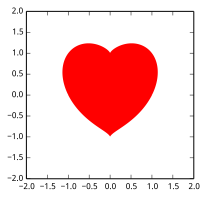

In [79]:
#%fig=matplotlib绘制心形隐函数曲线
x, y = np.mgrid[-2:2:500j, -2:2:500j]
z = (x**2 + y**2 - 1)**3 - x**2 * y**3
pl.contourf(x, y, z, levels=[-1, 0], colors=["red"])
pl.gca().set_aspect("equal");

VTK是一套功能十分强大的三维数据可视化库，TVTK库在标准的VTK库之上用Traits库进行封装。而Mayavi2则在TVTK的基础上再添加了一套面向应用的方便工具，它既可以单独作为3D可视化程序使用，也可以很方便地嵌入到TraitsUI编写的界面程序中。在下面的例子中，使用Mayavi绘制如下隐函数的曲面，其结果如`ref:fig-next`所示：

$$(x^2 + \frac{9}{4} y^2 + z^2 - 1)^3 - x^2 z^3 - \frac{9}{80} y^2 z^3 = 0$$

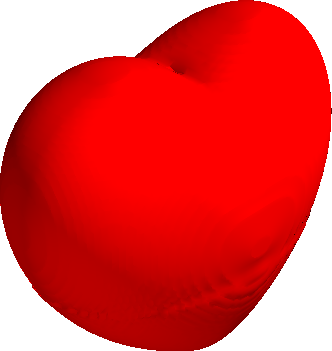

In [3]:
%%mlab_plot
#%fig=mayavi绘制心形隐函数曲面
from mayavi import mlab
x, y, z = np.mgrid[-3:3:100j, -1:1:100j, -3:3:100j]
f = (x**2 + 9.0/4*y**2 + z**2 - 1)**3 - x**2 * z**3 - 9.0/80 * y**2 * z**3
contour = mlab.contour3d(x, y, z, f, contours=[0], color=(1, 0, 0))

### 数据处理和分析

Pandas在NumPy的基础之上提供类似电子表格的数据结构`DataFrame`，并以此为核心提供了大量的数据的输入输出、清洗、处理、分析函数。其核心运算函数使用Cython编写，在不失灵活性的前提下保证了函数库的运算速度。

在下面的例子中，从电影打分数据MovieLens中读入用户数据文件`u.user`，并显示其头5条数据：

In [1]:
import pandas as pd
columns = 'user_id', 'age', 'sex', 'occupation', 'zip_code'
df = pd.read_csv("../data/ml-100k/u.user", 
                 delimiter="|", header=None, names=columns)
print((df.head()))

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


下面使用职业栏对用户数据进行分组，计算每组的平均年龄，按年龄排序之后将结果显示为柱状图。可以看到如此复杂的运算在Pandas中可以使用一行代码完成：

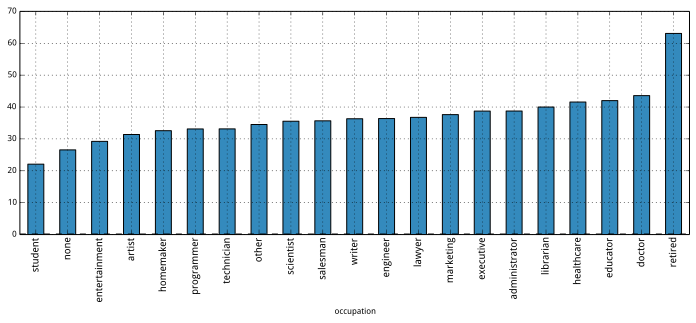

In [54]:
#%fig=使用Pandas统计电影打分用户的职业
df.groupby("occupation").age.mean().order().plot(kind="bar", figsize=(12, 4));

### 界面设计

Python可以使用多种界面库编写GUI程序，例如标准库中自带的以TK为基础的Tkinter，以wxWidgets为基础的wxPython和以QT为基础的pyQt4等界面库。但是使用这些界面库编写GUI程序仍然是一件十分繁杂的工作。为了让读者不在界面设计上耗费大量精力，从而能把注意力集中到如何处理数据上去，本书详细介绍了使用Traits库设计图形界面程序的方法。

Traits库分为Traits和TraitsUI两大部分，Traits为Python添加了类型定义的功能，使用它定义的Trait属性具有初始化、校验、代理、事件等诸多功能。

TraitsUI库基于Traits库，使用MVC（模型—视图—控制器）模式快速定义用户界面，在最简单的情况下，甚至不需要写一句界面相关的代码，就可以通过Traits的属性定义获得一个可以使用的图形界面。使用TraitsUI库编写的程序自动支持wxPython和pyQt两个经典的界面库。

### 图像处理和计算机视觉

OpenCV是一套开源的跨平台计算机视觉库。它可用于开发实时的图像处理、计算机视觉以及模式识别程序。它提供的Python包装模块可调用大部分OpenCV提供的功能。由于它采用NumPy数组表示图像，因此能很方便地与其它扩展库共享图像数据。

在下面的例子中，读入图像`moon.jpg`，并转换为二值图像。找到二值图中黑白区域相交的边线，并计算其周长和面积。然后通过这两个参数计算$\pi$。

In [1]:
import cv2
img = cv2.imread("moon.jpg", cv2.IMREAD_GRAYSCALE)
_, bimg = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
contour, _ = cv2.findContours(bimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contour = cv2.approxPolyDP(contour[0], epsilon=2, closed=False)
area = cv2.contourArea(contour)
perimeter = cv2.arcLength(contour, True)
perimeter**2 / (4 * area)

3.176088313869952

### 提高运算速度

Python的动态特性虽然方便了程序的开发，但也会极大地降低程序的运行速度。使用Cython可以将添加了类型声明的Python程序编译成C语言源代码，再编译成扩展模块，从而提高程序的运算速度。使用Cython即能实现C语言的运算速度，也能使用Python的所有动态特性，极大地方便了扩展库的编写。

下面是按照前面介绍的公式使用循环计算$\pi$的源程序，使用`cdef`关键字定义变量的类型，从而提高程序的运行效率：

In [30]:
%%cython
import cython

@cython.cdivision(True)
def calc_pi(int n):
    cdef double pi = 0
    cdef int i
    for i in range(1, n, 4):
        pi += 4.0 / i
    for i in range(3, n, 4):
        pi -= 4.0 / i
    return pi

调用`calc_pi()`计算$\pi$的近似值：

In [31]:
calc_pi(1000000)

3.141590653589821

下面使用`%timeit`比较`calc_pi()`和NumPy库计算$\pi$的运算时间：

In [32]:
n = 1000000
%timeit calc_pi(n)
%timeit np.sum(4.0 / np.r_[1:n:4, -3:-n:-4])

100 loops, best of 3: 3.9 ms per loop
100 loops, best of 3: 5.94 ms per loop
